# Stock Prediction Using LSTM

The stock market is extremely volatile and unpredictable. This project is only for educational purposes. Please do not use this as your prediction model and take financial decisions from it.

This notebook uses Recurrent Neural Networks to predict the behavior of the stock market from any recognized index (AAPL, MSFT, etc). The steps are as follow: 

1. Importing the necessary libraries.
2. Visualizing the data and creating the training dataset. 
3. Creating the LSTM model. 
4. Creating a testing dataset and predict against RMSE. 
5. Get a stock quote from the predicted index for a specific day. 
6. EXTRA

In [1]:
# Step 1 
import math # For complex math manipulations
import numpy as np # For array manipulations
import pandas as pd # For csv file I/O
import matplotlib.pyplot as plt # For data visualizations
import yfinance as yf # The data source
yf.pdr_override()
from pandas_datareader import data as pdr

# Libraries for the neural network 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout

plt.style.use('dark_background')

In [2]:
# Ticker is user-input
ticker = input("Enter input: ").upper()
df = pdr.get_data_yahoo(ticker, start='2013-01-01', end='2022-07-17')
df.head()

Enter input: AAL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,13.72,14.01,13.60,13.98,13.179525,6662000
2013-01-03,14.02,14.13,13.60,13.66,12.877851,5398400
2013-01-04,13.80,14.87,13.76,14.73,13.886579,12048300
2013-01-07,14.79,14.98,14.53,14.84,13.990285,5730600
2013-01-08,14.89,15.25,14.78,15.16,14.291963,8034400


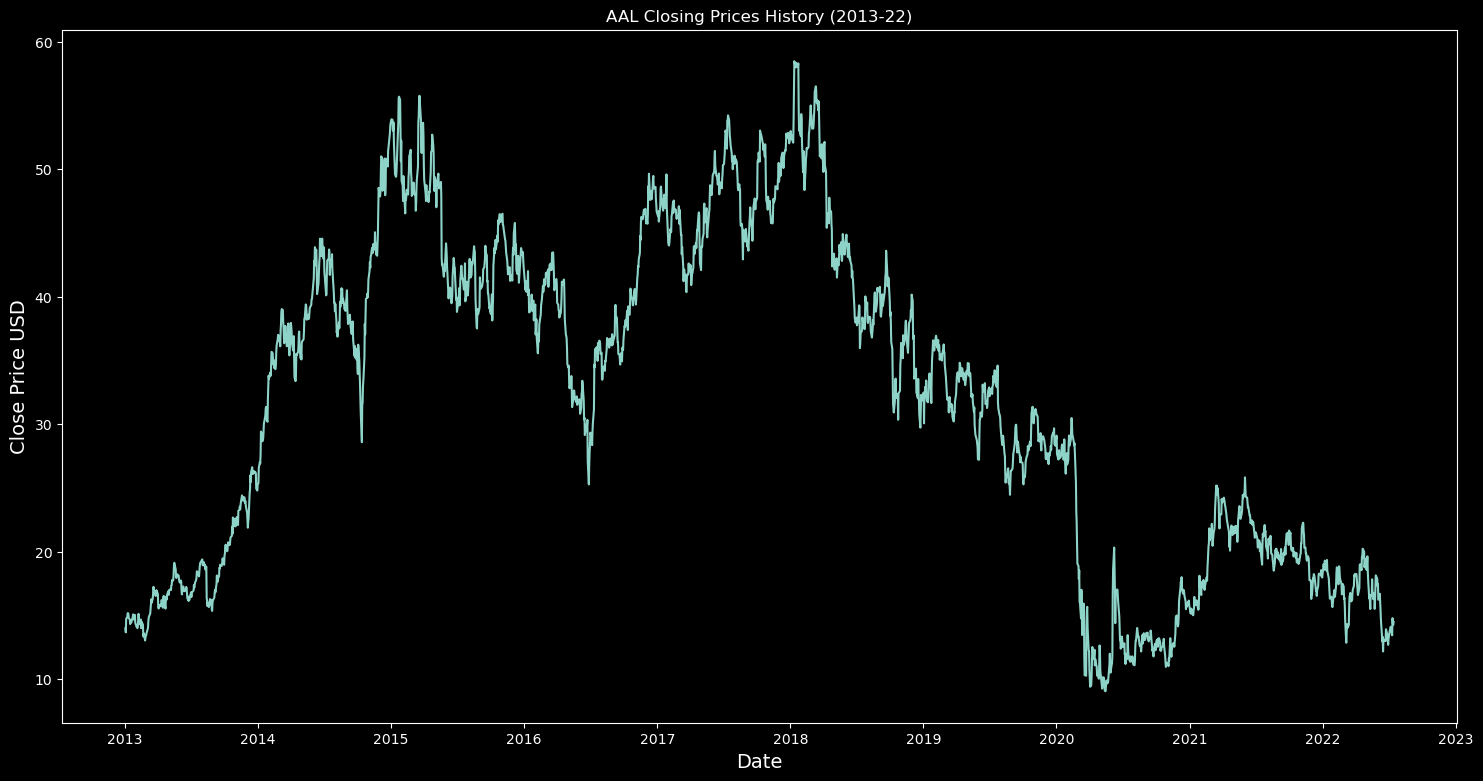

In [3]:
# Visualizing the dataframe
plt.figure(figsize=(18, 9))
plt.plot(df['Close'])
plt.title(f"{ticker} Closing Prices History (2013-22)")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price USD", fontsize=14)
plt.show()

In [4]:
data = df.filter(['Close'])
dataset = data.values
len_train = math.ceil(len(dataset) * 0.7)

In [5]:
# As LSTMs are very sensitive to the nature of data, they must be scaled for proper prediction.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
train_data = scaled[0:len_train,:]

In [6]:
# Step 2

x_train, y_train = [], []
for idx in range(60, len(train_data)): 
    x_train.append(train_data[idx-60:idx, 0])
    y_train.append(train_data[idx,0])
    if idx <= 60: 
        print(x_train)
        print(y_train)

[array([0.0999393 , 0.0934655 , 0.11511227, 0.11733765, 0.12381145,
       0.12320453, 0.12340684, 0.1161238 , 0.11389844, 0.10661542,
       0.11308922, 0.11005461, 0.10924539, 0.11753996, 0.12199069,
       0.11389844, 0.11996763, 0.12118146, 0.10884078, 0.10641311,
       0.10600849, 0.10277159, 0.10014161, 0.10216468, 0.11167308,
       0.12279991, 0.11551689, 0.10965001, 0.1058062 , 0.11369613,
       0.10014161, 0.11045923, 0.10560389, 0.0867894 , 0.08759862,
       0.09164474, 0.08051791, 0.08537326, 0.08840784, 0.08881247,
       0.09245397, 0.09832085, 0.10135545, 0.11187537, 0.11693303,
       0.1189561 , 0.12320453, 0.13068986, 0.13898442, 0.14586283,
       0.14040055, 0.14667208, 0.15658508, 0.16568884, 0.1610358 ,
       0.15820353, 0.15294356, 0.1511228 , 0.15395508, 0.16042887])]
[0.15435969897077068]


In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1621, 60, 1)

In [8]:
# Step 3

# I have created 3 LSTM layers along with 2 Dropout Layers, and I use 5 epochs due to the quick minimum

dropout = 0.2
optimizer = 'adam'
loss = 'mean_squared_error'

model = Sequential() 

model.add(LSTM(80, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(dropout))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(40))
model.add(Dense(1))

model.compile(optimizer=optimizer, loss=loss)
model.fit(x_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
55/55 [==============================] - 8s 65ms/step - loss: 0.0278
Epoch 2/5
55/55 [==============================] - 4s 65ms/step - loss: 0.0037
Epoch 3/5
55/55 [==============================] - 4s 64ms/step - loss: 0.0030
Epoch 4/5
55/55 [==============================] - 4s 65ms/step - loss: 0.0033
Epoch 5/5
55/55 [==============================] - 4s 64ms/step - loss: 0.0029


In [9]:
# Step 4: Creating the testing dataset. 

test_data = scaled[len_train-60:,:]

x_test = []
y_test = dataset[len_train:,:]

for idx in range(60, len(test_data)): 
    x_test.append(test_data[idx-60:idx, 0])

In [10]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 [==============================] - 2s 23ms/step


In [12]:
RMSE = np.sqrt(np.mean(predictions-y_test)**2)
RMSE

# RMSE of AAL is very very good. The model fits really well. 

0.6225309305720859

C:\Users\Aksha\AppData\Local\Temp\ipykernel_31056\3556830903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set['Predictions'] = predictions


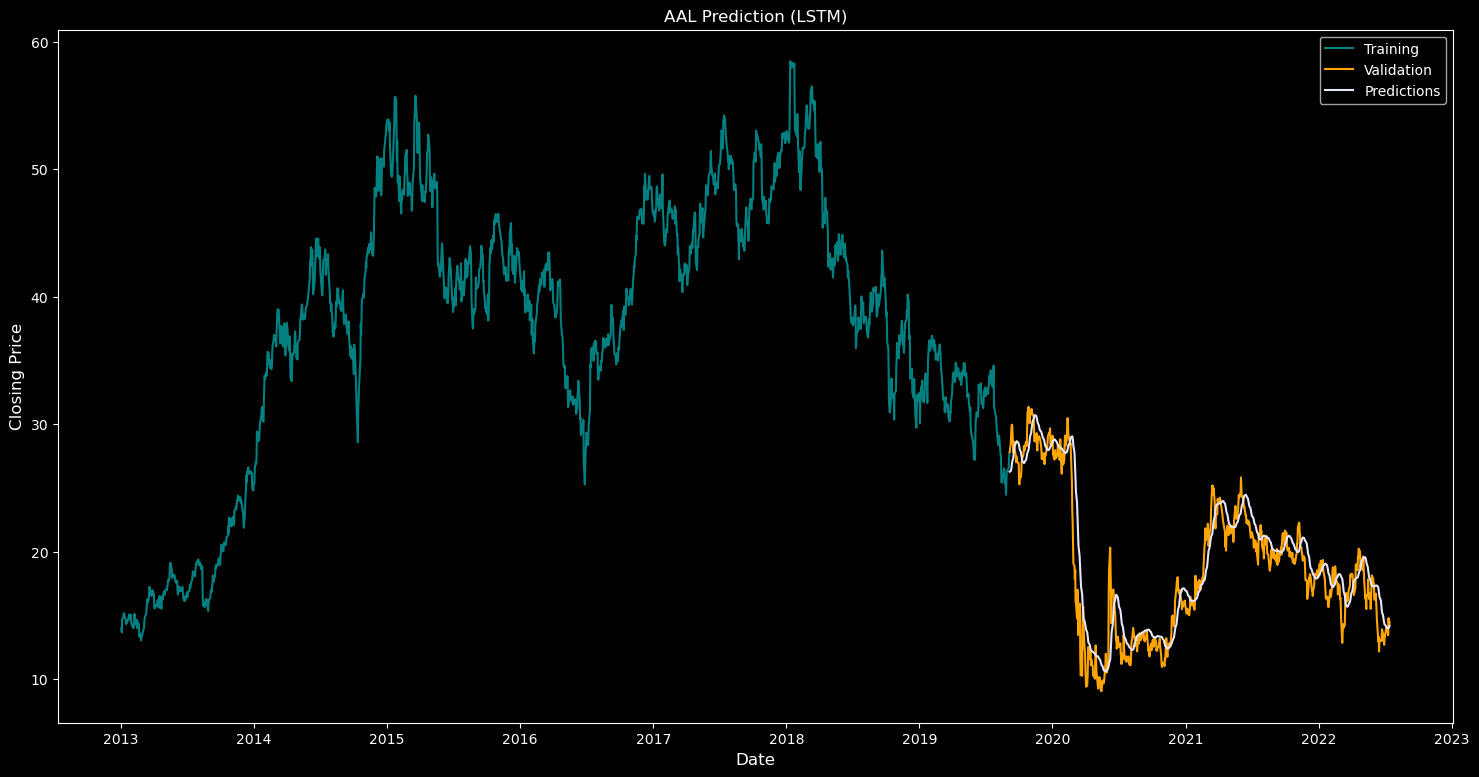

In [13]:
training_set = data[:len_train]
validation_set = data[len_train:]
validation_set['Predictions'] = predictions

plt.figure(figsize=(18, 9))
plt.title(f"{ticker} Prediction (LSTM)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.plot(training_set['Close'], color='teal', label='Training')
plt.plot(validation_set['Close'], color='orange', label='Validation')
plt.plot(validation_set['Predictions'], color='lavender', label='Predictions')
plt.legend()
plt.show()

In [14]:
# The comparison of predicted vs true closing price
validation_set

,Close,Predictions
Date,,
2019-09-06,27.790001,26.265425
2019-09-09,28.440001,26.310747
2019-09-10,29.120001,26.410982
2019-09-11,29.760000,26.567621
2019-09-12,29.940001,26.781101
...,...,...
2022-07-11,13.430000,13.986034
2022-07-12,14.770000,13.999028
2022-07-13,14.310000,14.034646


In [15]:
quote = pdr.get_data_yahoo(ticker, start='2013-01-01', end='2019-07-19')
quote_df = quote.filter(['Close'])
closing_value = quote_df[-90:].values
cl_val_scaled = scaler.transform(closing_value)
x_test = []
x_test.append(cl_val_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

print(f"Stock quote on {ticker} share: %s" % pred) # Ticker quote for 2019-07-19

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 1s/step
Stock quote on AAL share: [[33.067528]]


# Stacked LSTM vs Simple LSTM: What's the difference?

The stacked LSTM consists of multiple LSTM layers stacked on top of each other, as opposed to the simple LSTM (implemented above), which only consists of one LSTM layer. 

Simple LSTMs are very straightforward due to their architecture however, Stacked LSTMs are generally
more complex due to their architecture and can learn complex representations of data. However, whether Stacked is better than Simple depends on the nature of the task and the error yielded from both architectures. 

In [16]:
#  Implementing a Stacked-LSTM with three layers. 

stack_model = Sequential()

stack_model.add(LSTM(80, return_sequences = True, input_shape=(x_train.shape[1], 1)))
stack_model.add(LSTM(50, return_sequences = True))
stack_model.add(LSTM(30))
stack_model.add(Dense(1))

stack_model.compile(optimizer=optimizer, loss=loss)
stack_model.fit(x_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
55/55 [==============================] - 8s 62ms/step - loss: 0.0269
Epoch 2/5
55/55 [==============================] - 3s 62ms/step - loss: 0.0033
Epoch 3/5
55/55 [==============================] - 3s 62ms/step - loss: 0.0028
Epoch 4/5
55/55 [==============================] - 3s 62ms/step - loss: 0.0036
Epoch 5/5
55/55 [==============================] - 3s 62ms/step - loss: 0.0025


In [17]:
 # Creating the testing dataset and predicting against RMSE.
stacked_x_test = []
stacked_y_test = dataset[len_train:,:]

for idx in range(60, len(test_data)): 
    stacked_x_test.append(test_data[idx-60:idx, 0])

In [18]:
stacked_x_test = np.array(stacked_x_test)
stacked_x_test = np.reshape(stacked_x_test, (stacked_x_test.shape[0], stacked_x_test.shape[1], 1))

In [19]:
stack_pred = stack_model.predict(stacked_x_test)
stack_pred = scaler.inverse_transform(stack_pred)

23/23 [==============================] - 2s 23ms/step


In [20]:
RMSE_stacked = np.sqrt(np.mean(stack_pred-stacked_y_test) ** 2)
RMSE_stacked

0.3248805416954888

For this index, a simple LSTM performs better due to the output. 
1. RMSE (Simple LSTM): 0.88
2. RMSE (Stacked LSTM): 1.57

However for AAPL, a Stacked LSTM performed better. 
1. RMSE (Simple LSTM): 16.56
2. RMSE (Stacked LSTM): 9.78

It's up to personal preference on which architecture to use. 